<a href="https://colab.research.google.com/github/muresanfilip4/AI-Labss/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arbori de decizie**



---
***Etape in construirea unui model***


1.   Definirea problemei si obtinerea setului de date
2.   Definirea variabilelor independente si a variabilei tinta
3. Partitionarea datelor in Training si Validare (Testare)
4. Construirea modelului (in exemplul nostru Arbore de decizie)
5. Evaluarea modelului (alegerea celei mai potrivite masuri, in functie de tipul problemei)
6. (Optional) Vizualizari ale modelului.





***Descrierea problemei***

Diagnosticarea pacientilor pentru diabet, avand la dispozitie o serie de diagnostice bazate pe mai multe variabile masurate. 
Variabila tinta este binara (Pozitiv/Negativ).

Sursa datelor:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

Importul bibliotecilor

In [1]:
import pandas as pd #utilizam pandas pentru a lucra cu dataframe
from sklearn.tree import DecisionTreeClassifier # Import Arbore de decizie
from sklearn.model_selection import train_test_split # Import functie partitionare date
from sklearn import metrics #Import biblioteca pentru masurarea acuratetii


Incarcarea datelor

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# variabila col_names este optionala si o folosim daca nu dorim sa utilizam capul de tabel din fisier, sau daca nu avem in fisier definita coloanelor
df = pd.read_csv("diabetes.csv", header=None, skiprows = 1, names=col_names) # header=None - nu utilizam capul de tabel


Vizualizare date

In [3]:
df.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Definirea variabilei tinta

In [4]:
y=df.label
X=df.drop(columns='label')
print(X,y)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0           6      148  72    35        0  33.6     0.627   50
1           1       85  66    29        0  26.6     0.351   31
2           8      183  64     0        0  23.3     0.672   32
3           1       89  66    23       94  28.1     0.167   21
4           0      137  40    35      168  43.1     2.288   33
..        ...      ...  ..   ...      ...   ...       ...  ...
763        10      101  76    48      180  32.9     0.171   63
764         2      122  70    27        0  36.8     0.340   27
765         5      121  72    23      112  26.2     0.245   30
766         1      126  60     0        0  30.1     0.349   47
767         1       93  70    31        0  30.4     0.315   23

[768 rows x 8 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


Partitionarea datelor (70% training, 30% test)

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training  30% test


Construirea arborelui de decizie

In [6]:
#definire model
clf = DecisionTreeClassifier()

#Antrenament
clf = clf.fit(X_train,y_train)

#Predictie
y_pred = clf.predict(X_test)

Evaluarea modelului (accuracy) se face folosind setul de date pentru testare. Evaluarea unui model nu se face pe setul de training!

In [7]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.696969696969697


Vizualizare arbore

***Biblioteci pt vizualizare***

In [8]:
#daca este necesar
!pip install graphviz

!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

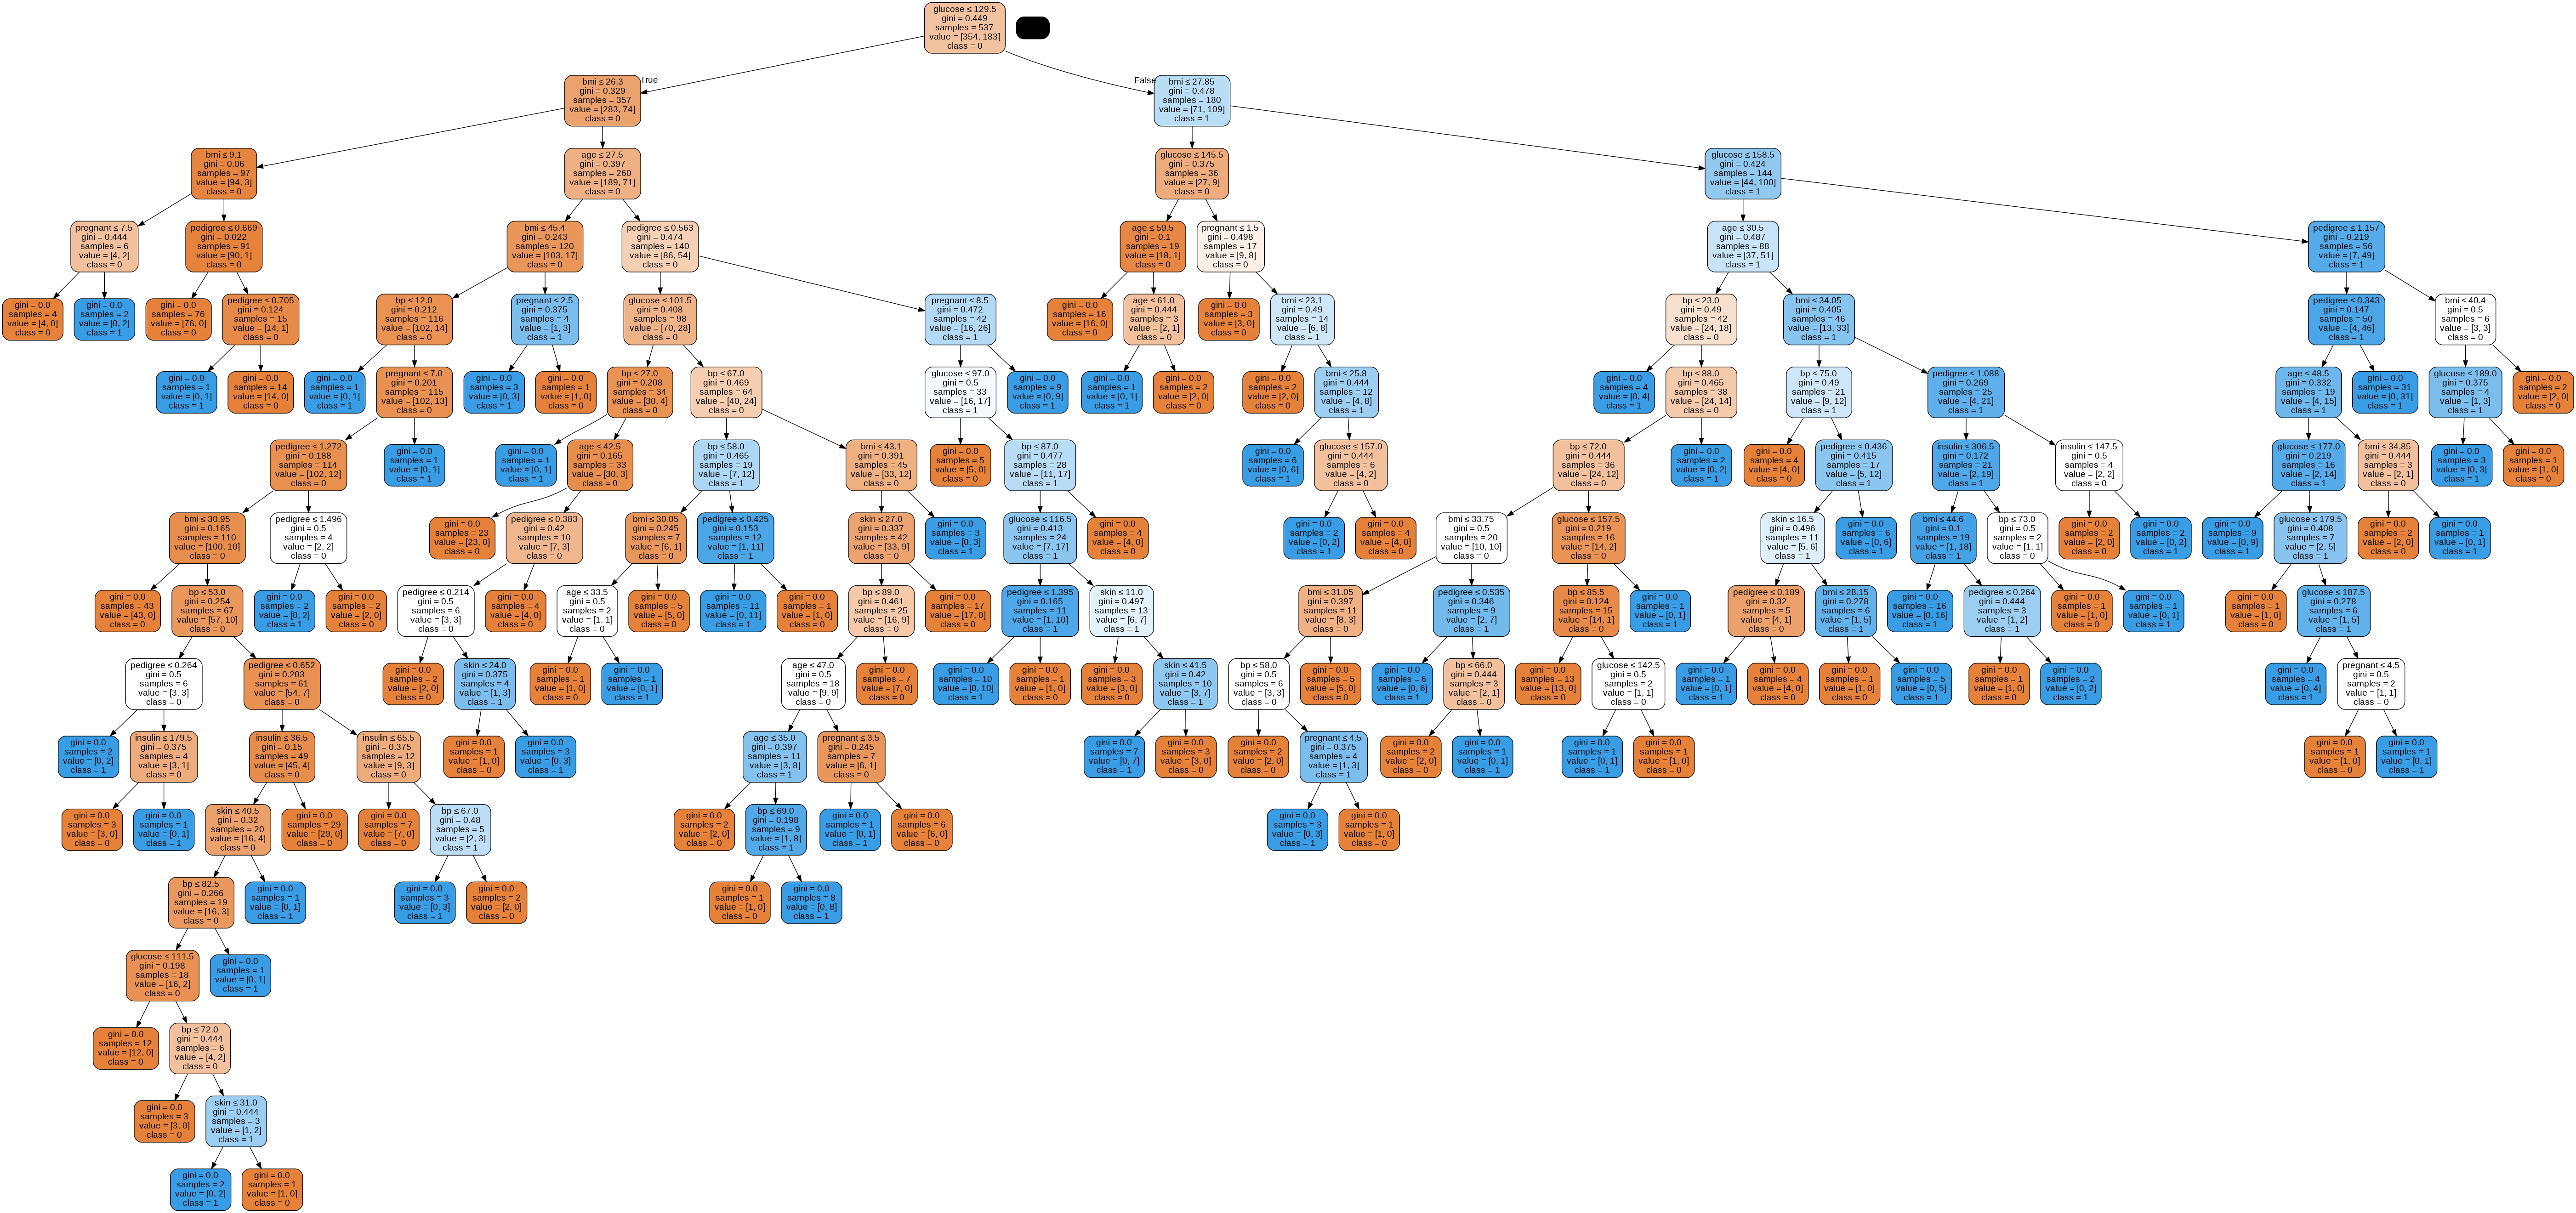

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

**Exercitii**
1. Studiati functionalitatile modelului DecisionTreeClassifier() din biblioteca scikitlearn.
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2. Modificati parametrii modelului si observati schimbarile in performanta. 

3. Cautati variante pentru pruning (reducerea dimensionalitatii arborelui) in aceeasi biblioteca.

Hint Ex.3: Puteti folosi ca si parametri pentru pruning *max_depth* sau *min_samples_leaf* sau *min_samples_split*